#Matrix transformations

1. For the given coordinates, scale by factor of 4 and rotate a matrix by 50 degree

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL  import Image
import scipy
from skimage import data
from numpy import *

def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))).astype(np.int) if homogenous else coords

def grid_plotter(points, labels):
    markers = ['o', 'x', 's', '^', 'p', 'v']
    fig, ax = plt.subplots(figsize=(8,6))
    for i, p in enumerate(points):
        x, y = p[0], p[1]
        ax.scatter(x, y, label=labels[i], marker=markers[i], alpha=0.8, s=100)
    ax.legend(loc='lower right')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    ax.grid(True)
    plt.show()

In [2]:
# Define Transformations
def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])


def get_scale(s):
    return np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1]
    ])


In [3]:
R1 = get_rotation(45)
S1 = get_scale(3)

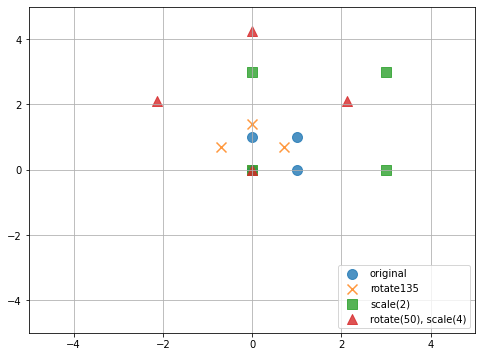

In [4]:

# Get sample coordinates
coords = get_grid(2, 2, homogenous=True)

# Apply transformation
coords_rot = R1 @ coords
coords_scale = S1 @ coords

coords_composite1 = R1 @ S1 @ coords

grid_plotter([coords, coords_rot, coords_scale, coords_composite1],
             labels=['original', 'rotate135', 'scale(2)', 'rotate(50), scale(4)'])

#Matrix operations

2. For the given matrix A, find
- determinant
- rank
- inverse
- Eigen value

In [5]:
# matrix determinant
from numpy import array
from numpy.linalg import det
from numpy.linalg import matrix_rank

# define matrix
A = array([
[22, 32, 13],
[14, 5, 16],
[19, 18, 15]])

print(A)

[[22 32 13]
 [14  5 16]
 [19 18 15]]


In [6]:
#Determinant
det(A)

362.9999999999999

In [7]:
#Rank
print(matrix_rank(A))

3


In [8]:
#Inverse
from numpy.linalg import inv
inv(A)

array([[-0.58677686, -0.67768595,  1.23140496],
       [ 0.25895317,  0.22865014, -0.46831956],
       [ 0.43250689,  0.58402204, -0.93112948]])

In [9]:
#Eigen_value
import numpy as np
import scipy.linalg as la

In [10]:
eigen_value,eigen_vector = la.eig(A)
eigen_value

array([51.26682346+0.j, -0.84027296+0.j, -8.4265505 +0.j])

In [11]:
eigen_vector

array([[-0.70653376, -0.76754065,  0.73929283],
       [-0.4126179 ,  0.32288148, -0.66780726],
       [-0.57494045,  0.55374082, -0.08648448]])

3. Convert the following matrix to an orthogonal matrix using Gram Schmidt Process.

In [12]:
A = np.array([[9,8,7], [6,5,4], [3,2,1]])
A

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

In [13]:
det(A)

0.0

In [14]:
## Since the determinant value is not equal to -1 or +1
## It is not an orthogonal matrix

Check if the above matrix is orthogonal and if not, convert to an orthogonal matrix.

In [31]:
A.dot(A.T)

array([[194, 122,  50],
       [122,  77,  32],
       [ 50,  32,  14]])

since the inner/ dot product of A and A Transpose is not an identity matrix, the matrix A is not orthogonal.

In [16]:
# Gram Schmidt Process

In [17]:
u1,u2,u3=A[:,0],A[:,1],A[:,2]

In [30]:
u1

array([9, 6, 3])

In [18]:
mag_u1=np.linalg.norm(u1)
mag_u1

11.224972160321824

In [19]:
v1=u1/mag_u1
v1

array([0.80178373, 0.53452248, 0.26726124])

In [20]:
w2=u2-(u2.dot(v1))*v1
w2

array([ 0.28571429, -0.14285714, -0.57142857])

In [21]:
mag_w2=np.linalg.norm(w2)
mag_w2

0.6546536707079773

In [22]:
v2=w2/mag_w2
v2

array([ 0.43643578, -0.21821789, -0.87287156])

In [ ]:
w3=u3-(u3.dot(v1))*v1-(u3.dot(v2))*v2 

In [23]:
w3=u3-(u3.dot(v1))*v1-(u3.dot(v2))*v2
w3

array([ 1.99840144e-15, -5.55111512e-17, -3.55271368e-15])

In [24]:
mag_w3=np.linalg.norm(w3)
mag_w3

4.07657507034135e-15

In [25]:
v3 = w3/mag_w3
v3

array([ 0.49021578, -0.01361711, -0.87149473])

In [26]:
B=np.column_stack((v1,v2,v3))
B

array([[ 0.80178373,  0.43643578,  0.49021578],
       [ 0.53452248, -0.21821789, -0.01361711],
       [ 0.26726124, -0.87287156, -0.87149473]])

In [28]:
C = np.array([[0.8271,	0.5201,	0.2132],
[-0.3864,	0.2506,	0.8876 ],
[-0.7071,	0,	-0.7071]])


In [29]:
det(C)

-0.5773123182539999